In [8]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))

In [15]:
df = pd.read_csv('scopus (1).csv')
df.head()

Title  \
0  Diabetes prediction using Shapley additive exp...   
1  Artificial Intelligence in Social Media Forens...   
2  BioinspiredLLM: Conversational Large Language ...   
3  The impact of artificial intelligence on organ...   
4  The diabacare cloud: predicting diabetes using...   

                        Source title  \
0  Multimedia Tools and Applications   
1          Electronics (Switzerland)   
2                   Advanced Science   
3    Data and Information Management   
4      Acta Scientiarum - Technology   

                                                Link  \
0  https://www.scopus.com/inward/record.uri?eid=2...   
1  https://www.scopus.com/inward/record.uri?eid=2...   
2  https://www.scopus.com/inward/record.uri?eid=2...   
3  https://www.scopus.com/inward/record.uri?eid=2...   
4  https://www.scopus.com/inward/record.uri?eid=2...   

                                            Abstract  \
0  Technologies like cloud computing, Artificial ...   
1  Social media platforms have completely revolut...   
2  The study of biological materials and bio-insp...   
3  As digital transformation continues to advance...   
4  Machine learning (ML) is the buzz all around t...   

                                      Index Keywords  
0  Additives; Classification (of information); He...  
1                                                NaN  
2  Artificial Intelligence; Biomimetic Materials;...  
3  Life cycle; Machine learning; Network security...  
4                                                NaN

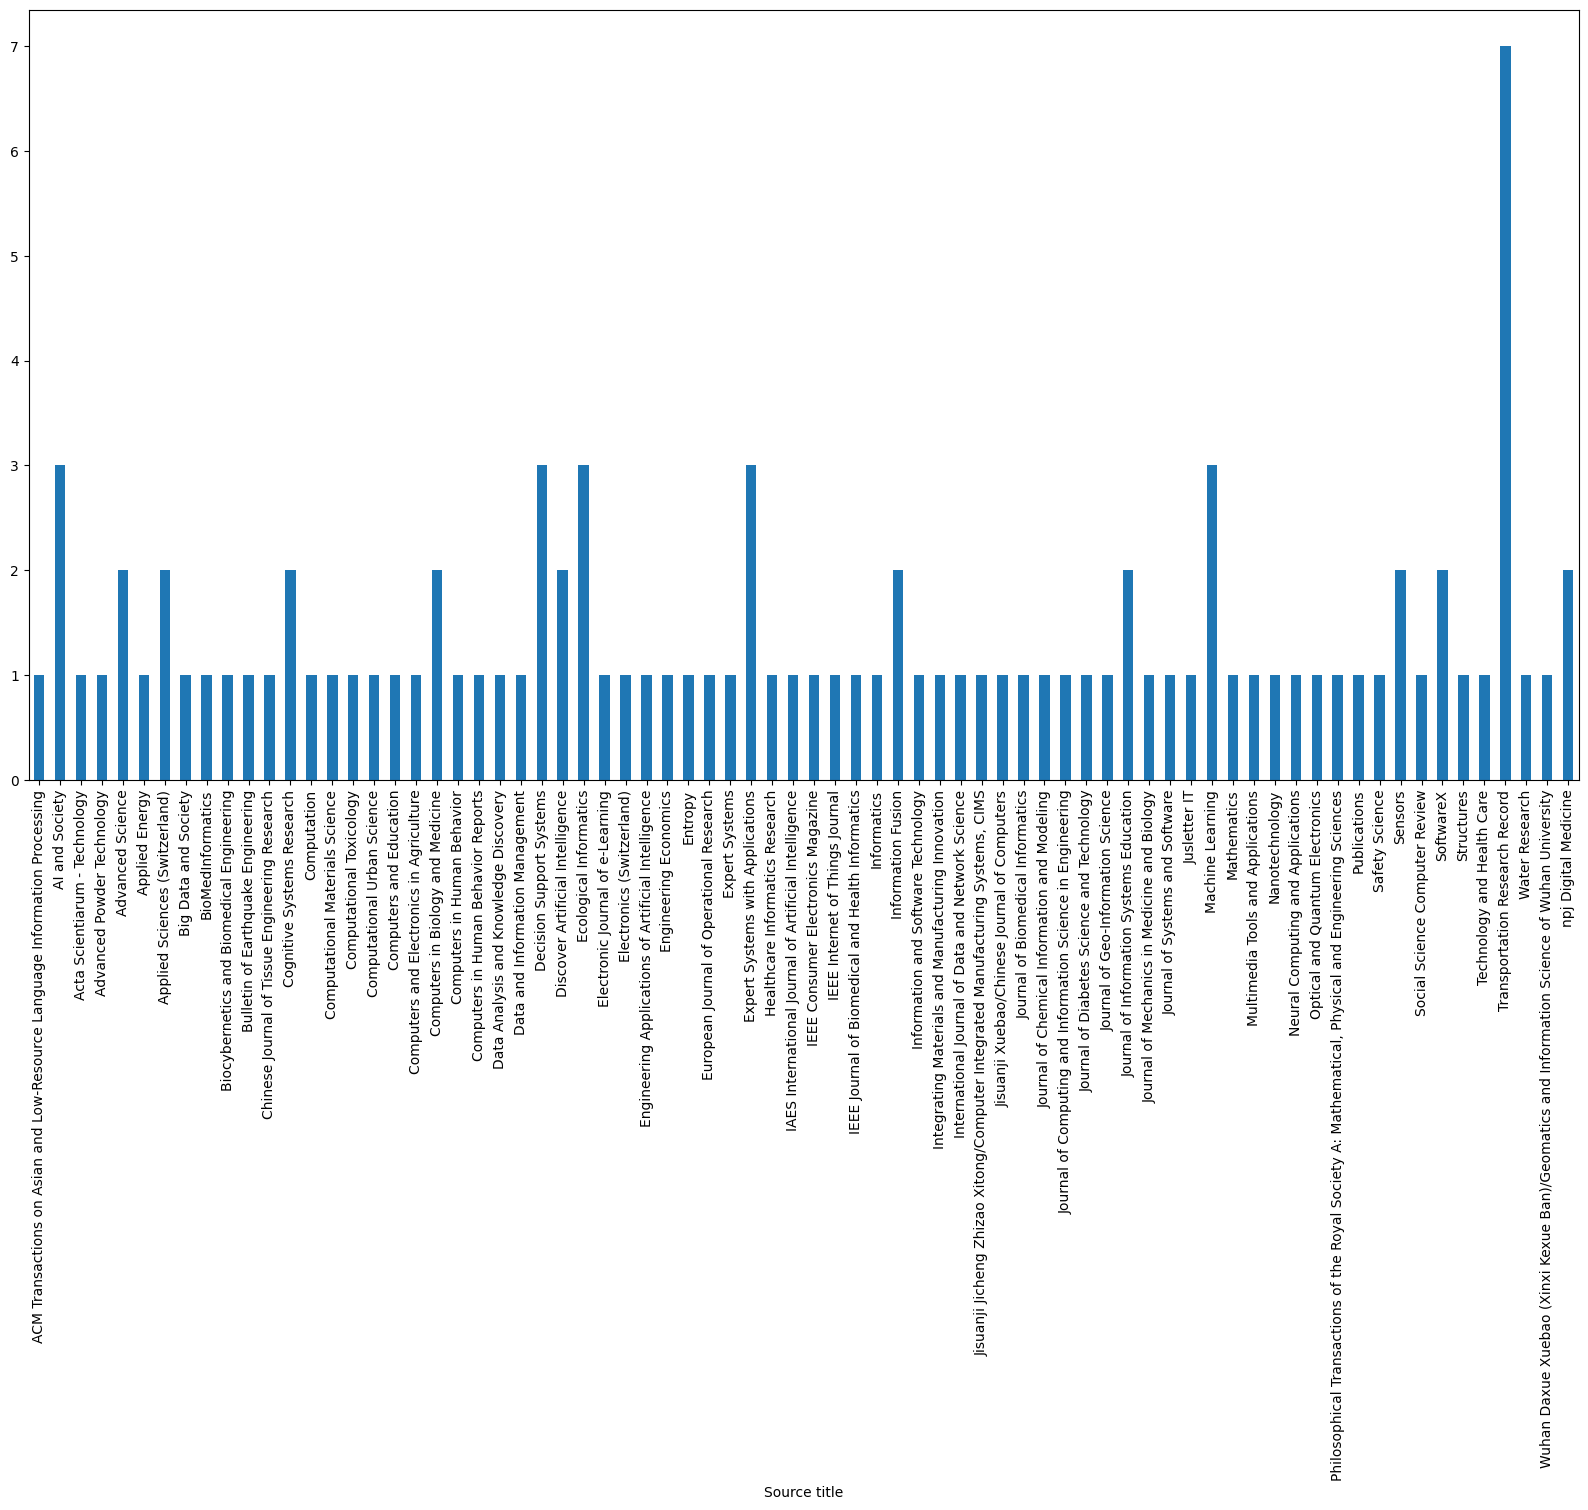

In [16]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(20, 10))
grouped.plot(kind='bar')
plt.show()

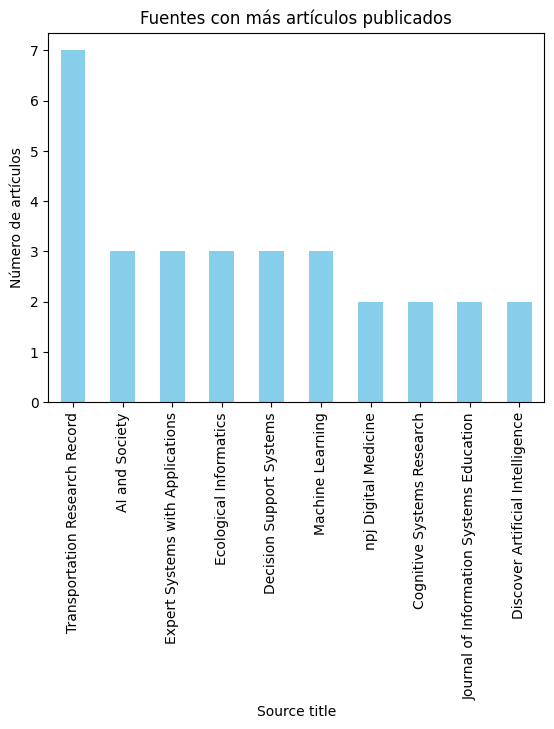

In [17]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(10)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [18]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

In [19]:
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

Word  Frequency  Rank
0     artificial         26   1.0
1   intelligence         23   2.0
2       learning         18   3.0
3          using         14   4.0
4           data         14   4.0
5       analysis         10   5.0
6        science         10   5.0
7             ai         10   5.0
8        machine         10   5.0
9     prediction          9   6.0
10        review          8   7.0
11         based          8   7.0
12        neural          7   8.0
13       towards          6   9.0
14       network          6   9.0
15         model          6   9.0
16       systems          5  10.0
17    systematic          5  10.0
18      research          5  10.0
19        design          5  10.0

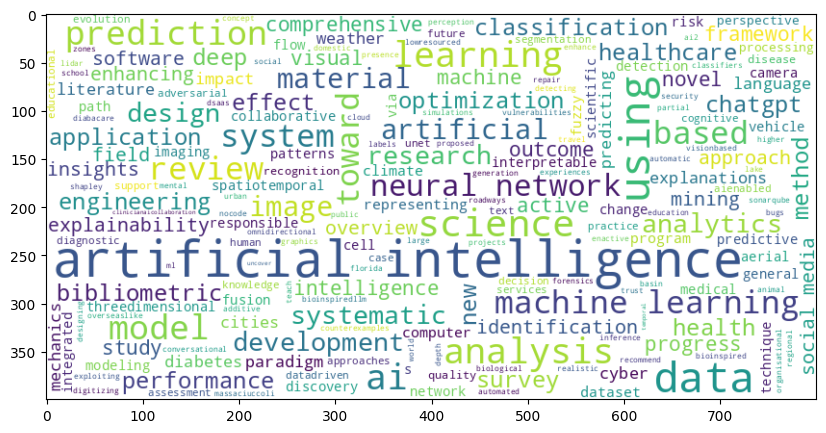

In [20]:
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

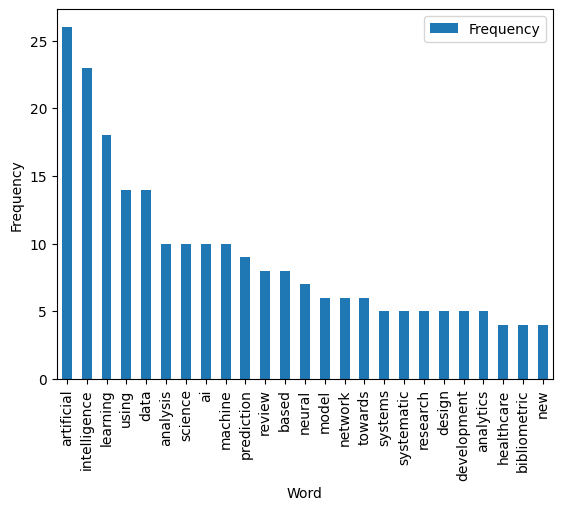

In [21]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-25-5492a4065ecb>:27: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-input-25-5492a4065ecb>:27: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-input-25-5492a4065ecb>:27: UserWarning: Glyph 31227 (\N{CJK UNIFIED IDEOGRAPH-79FB}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-input-25-5492a4065ecb>:27: UserWarning: Glyph 21160 (\N{CJK UNIFIED IDEOGRAPH-52A8}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-input-25-5492a4065ecb>:27: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-i

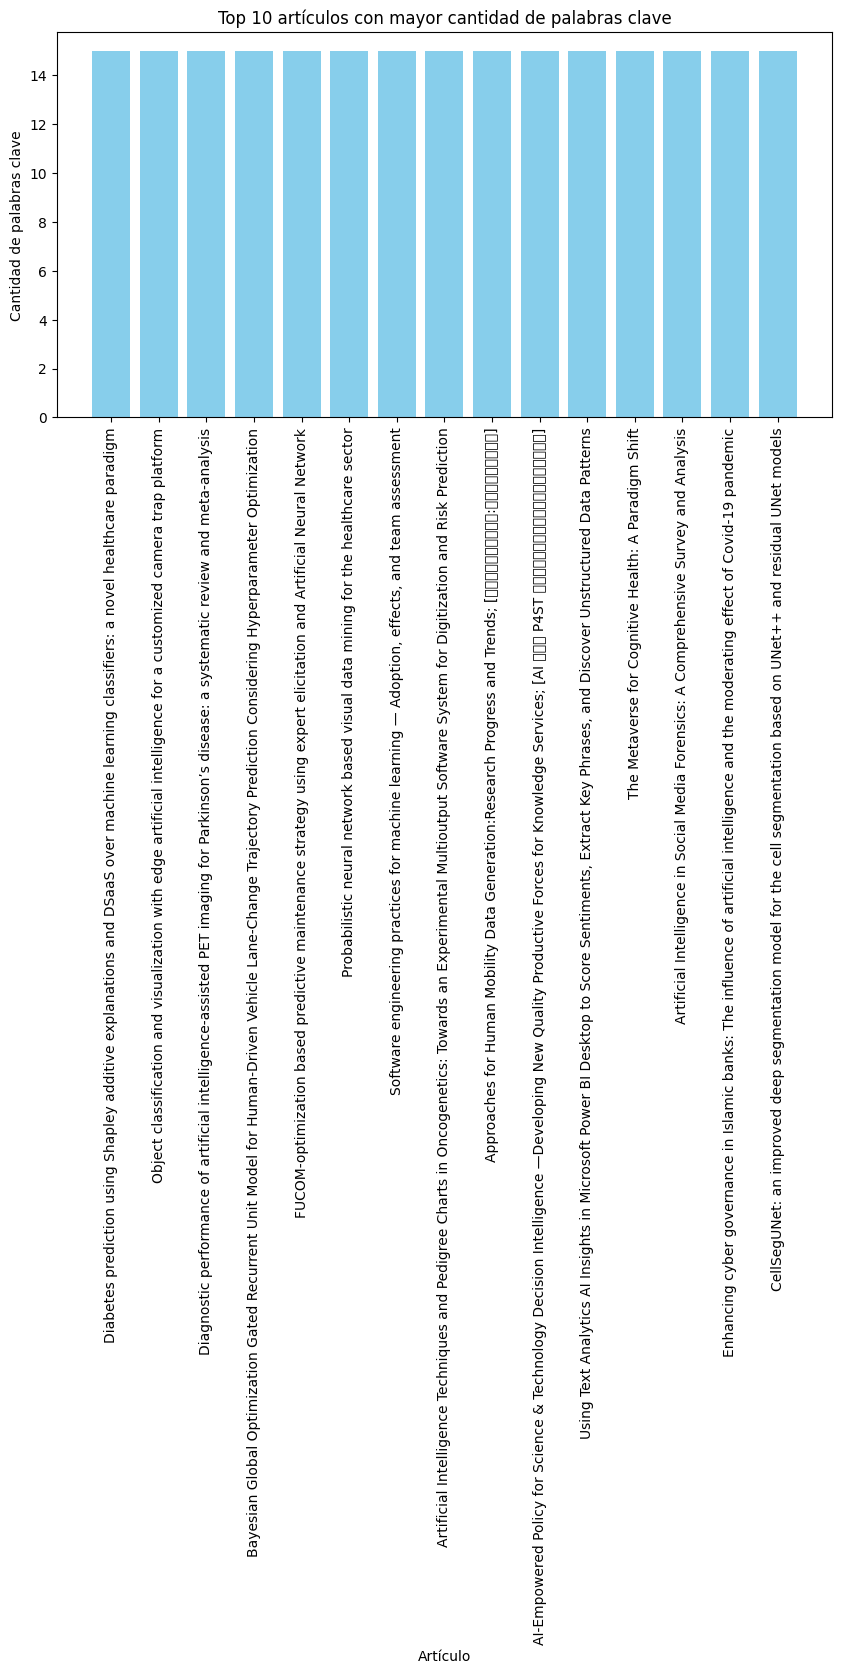

In [25]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [26]:


# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(10)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")

Resumen 1:
The accuracy achieved by the Neural Network (NN) classifier is 77.9% on a sample dataset of 768 instances and 9 attributes. In this paper, we deeply analyzed the confluence of cloud-based technologies with AI, IoT, and data science capabilities, where data science is introduced as a Service (DSaaS) platform for cloud-based services to predict diabetes. To this end, a paradigm for smart healthcare systems using data Science and cloud-enabled platforms is proposed.

Resumen 2:
© 2023 The camera traps have revolutionized the image and video capture in ecology and are often used to monitor and record animal presence. With miniaturization of low power electronic devices, better battery technologies, and software advancements, it has become possible to use the edge devices, such as Raspberry Pi as camera traps that can not only capture images and videos, but can also enable sophisticated image processing, and off-site communications.

Resumen 3:
Artificial intelligence (AI)-assist

In [27]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")

Title: Diabetes prediction using Shapley additive explanations and DSaaS over machine learning classifiers: a novel healthcare paradigm
Summary: The accuracy achieved by the Neural Network (NN) classifier is 77.9% on a sample dataset of 768 instances and 9 attributes. In this paper, we deeply analyzed the confluence of cloud-based technologies with AI, IoT, and data science capabilities, where data science is introduced as a Service (DSaaS) platform for cloud-based services to predict diabetes.

Title: Bayesian Global Optimization Gated Recurrent Unit Model for Human-Driven Vehicle Lane-Change Trajectory Prediction Considering Hyperparameter Optimization
Summary: To address the low accuracy and inefficiency of current lane-change trajectory prediction methods for human-driven vehicles, this study develops a neural network lane-change trajectory prediction model with hyperparametric optimization capability using Bayesian optimization and gated recurrent units to consider the effect of l